In [105]:
# Importación de librerías
import seaborn as sns
import pandas as pd
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [106]:
# Configuración de graficos.
sns.set_style("whitegrid")  
sns.set_context("notebook")

In [107]:
# Carga del dataset
df = sns.load_dataset(name="diamonds")

# Head del dataset (primeros 5 registros)
print(df.head(),"\n")
      
# Tamaño del dataframe
print("El tamaño del df es: ",df.shape,"\n")

# Tipos de datos del df
print(df.info())

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75 

El tamaño del df es:  (53940, 10) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64

In [108]:
# Revision valores nulos y duplicados
print(df.isnull().sum(),"\n")
print(df.duplicated().sum(),"\n")



# Trabajar sobre la copia, para luego aplicarle los pasos al df original
df1 = df.copy()

# Eliminación de duplicados.
df1 = df.drop_duplicates().reset_index(drop=True)
print(df1.duplicated().sum(),"\n")
print(df1.shape)

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64 

146 

0 

(53794, 10)


# 📘 Dataset: `diamonds`

El dataset **`diamonds`** contiene información sobre **53,794 diamantes**, incluyendo características físicas y de calidad, junto con su precio.  
Es ampliamente utilizado para **análisis exploratorio**, **visualización de datos** y **modelos predictivos**.

---

## 📊 Columnas

| **Columna** | **Tipo** | **Descripción** |
|--------------|-----------|-----------------|
| `carat` | `float` | Peso del diamante en quilates. Es una medida continua (por ejemplo, 0.23, 1.05). Cuanto mayor el valor, generalmente más caro el diamante. |
| `cut` | `category` | Calidad del corte del diamante (cómo se talló). Afecta su brillo. Tiene 5 categorías ordenadas: **Fair**, **Good**, **Very Good**, **Premium**, **Ideal**. |
| `color` | `category` | Color del diamante, medido de **D** a **J**.<br>**D** = incoloro (mejor calidad), **J** = con más tono amarillo. |
| `clarity` | `category` | Grado de claridad del diamante (defectos internos o externos). Ordenada así: **I1** (peor), **SI2**, **SI1**, **VS2**, **VS1**, **VVS2**, **VVS1**, **IF** (mejor). |
| `depth` | `float` | Profundidad total del diamante expresada como porcentaje:<br>`(z / mean(x, y)) * 100`.<br>Indica qué tan alto es en comparación con su ancho. |
| `table` | `float` | Ancho de la parte superior del diamante (la “mesa”) en porcentaje respecto al ancho total. Valores típicos entre **50–70**. |
| `price` | `int` | Precio del diamante en dólares estadounidenses (USD). Es la variable dependiente más usada en análisis y modelos. |
| `x` | `float` | Longitud del diamante (en milímetros). |
| `y` | `float` | Ancho del diamante (en milímetros). |
| `z` | `float` | Profundidad del diamante (en milímetros). |

In [109]:
# Descripción de variables
print(df1.dtypes)

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object


In [110]:
# Resumen estadístico del dataframe
print(df1.describe())

             carat         depth         table         price             x  \
count  53794.00000  53794.000000  53794.000000  53794.000000  53794.000000   
mean       0.79778     61.748080     57.458109   3933.065082      5.731214   
std        0.47339      1.429909      2.233679   3988.114460      1.120695   
min        0.20000     43.000000     43.000000    326.000000      0.000000   
25%        0.40000     61.000000     56.000000    951.000000      4.710000   
50%        0.70000     61.800000     57.000000   2401.000000      5.700000   
75%        1.04000     62.500000     59.000000   5326.750000      6.540000   
max        5.01000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53794.000000  53794.000000  
mean       5.734653      3.538714  
std        1.141209      0.705037  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.030000  
max      

In [111]:
# Distribución de categorias
categorical_cols = df1.select_dtypes(include=['object','category'])

for i in categorical_cols.columns:
    print(df1[i].value_counts(),"\n")


cut
Ideal        21488
Premium      13748
Very Good    12069
Good          4891
Fair          1598
Name: count, dtype: int64 

color
G    11262
E     9776
F     9520
H     8272
D     6755
I     5407
J     2802
Name: count, dtype: int64 

clarity
SI1     13032
VS2     12229
SI2      9150
VS1      8156
VVS2     5056
VVS1     3647
IF       1784
I1        740
Name: count, dtype: int64 



# Análisis Univariado

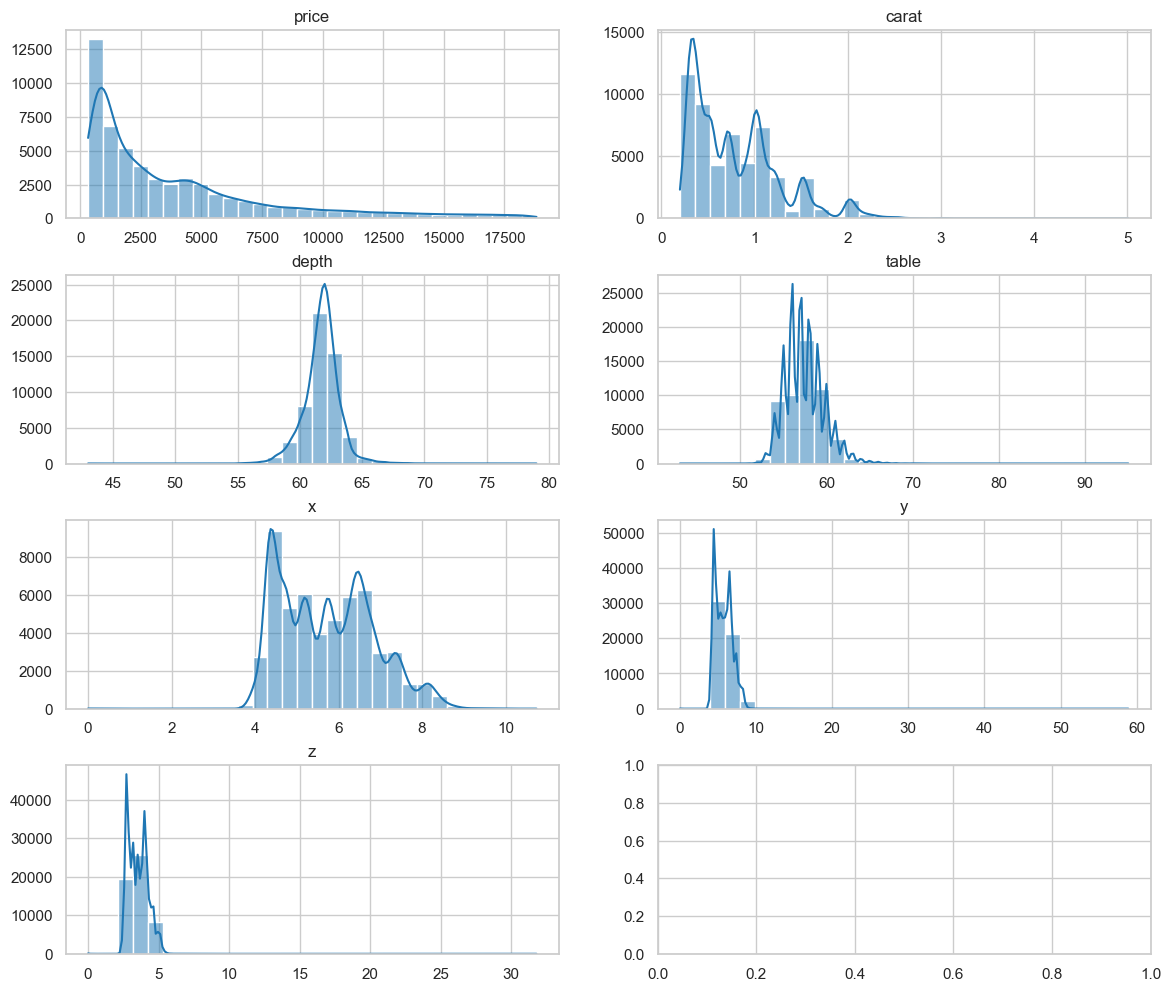

In [112]:
fig, axes = plt.subplots(4,2, figsize = (14,12))
axes = axes.flatten()

# Df con las columnas numéricas.
numeric_columns = df1[["price","carat","depth","table","x","y","z"]]

#Ciclo for para cada variable
for i,col in enumerate(numeric_columns.columns):
    sns.histplot(data=df1, bins=30, x=col,kde=True, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_ylabel("")
    axes[i].set_xlabel("");


plt.subplots_adjust(hspace=0.3)

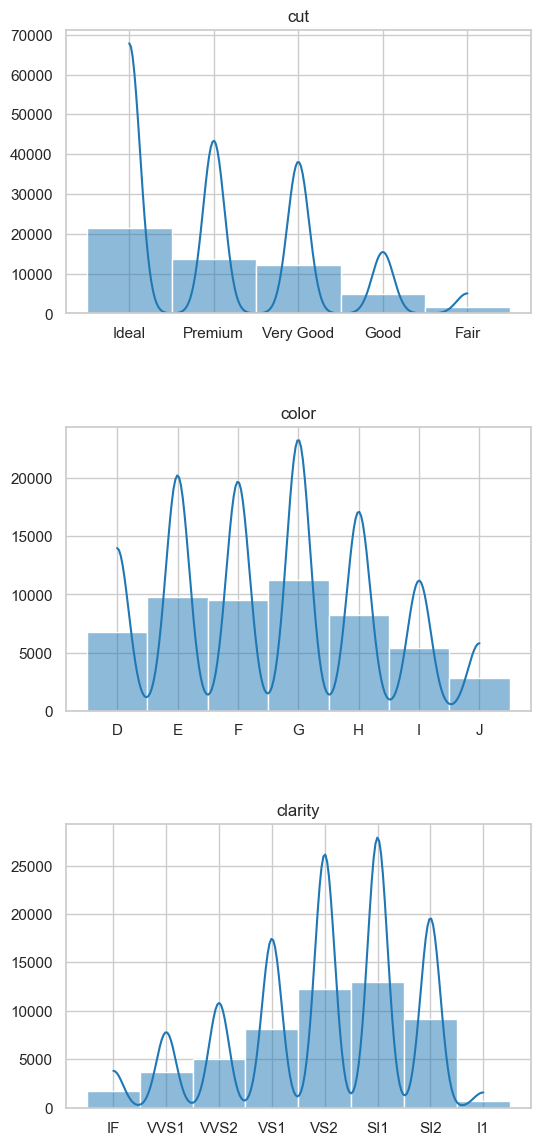

In [113]:
fig, axes = plt.subplots(3,1, figsize = (6,14))
axes = axes.flatten()

# Df con las columnas categóricas.
categoric_columns = df1[["cut","color","clarity"]]

#Ciclo for para cada variable
for i,col in enumerate(categoric_columns.columns):
    sns.histplot(data=df1, bins=30, x=col,kde=True, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_ylabel("")
    axes[i].set_xlabel("");


plt.subplots_adjust(hspace=0.4)

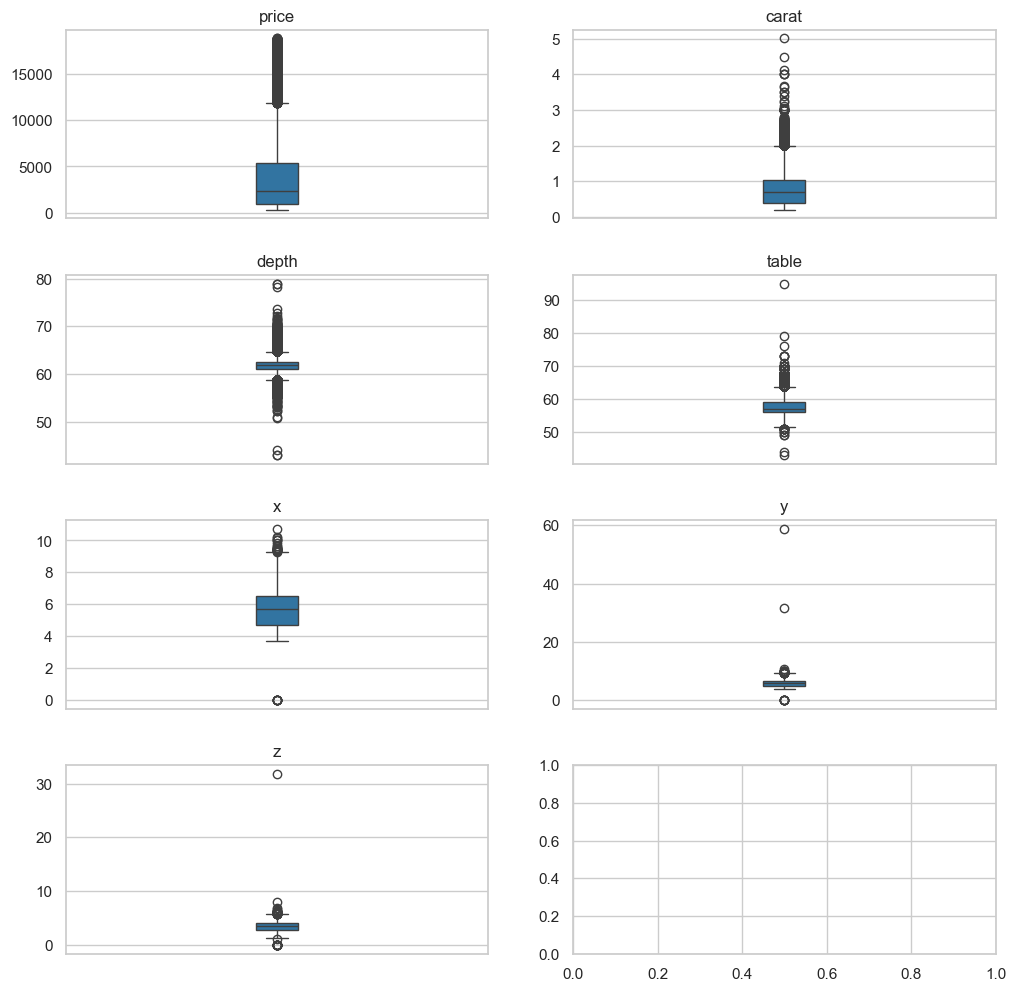

In [114]:
fig, axes = plt.subplots(4,2, figsize = (12,12))
axes = axes.flatten()

#Ciclo for para cada variable
for i,col in enumerate(numeric_columns.columns):
    sns.boxplot(data=df, y=col, ax=axes[i],
                width=0.1) # 🔹 más delgado

    axes[i].set_title(col)
    axes[i].set_ylabel("")
    axes[i].set_xlabel("")
    


plt.subplots_adjust(hspace=0.3);

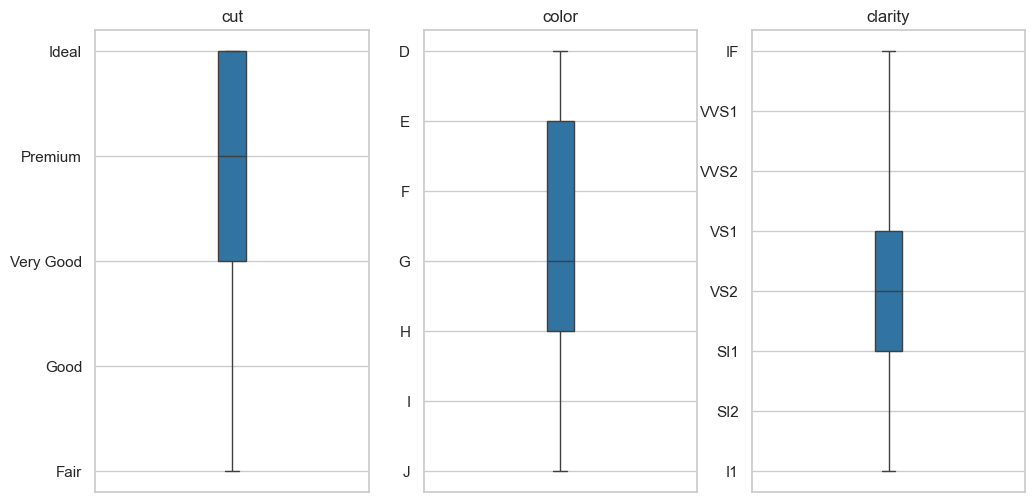

In [115]:
fig, axes = plt.subplots(1,3, figsize = (12,6))
axes = axes.flatten()

#Ciclo for para cada variable
for i,col in enumerate(categoric_columns.columns):
    sns.boxplot(data=df, y=col, ax=axes[i],
                width=0.1) # 🔹 más delgado

    axes[i].set_title(col)
    axes[i].set_ylabel("")
    axes[i].set_xlabel("")
    


plt.subplots_adjust(hspace=0.3);

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_6348\2216519743.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette="pastel")
C:\Users\Sebastian\AppData\Local\Temp\ipykernel_6348\2216519743.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette="pastel")
C:\Users\Sebastian\AppData\Local\Temp\ipykernel_6348\2216519743.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette="pastel")


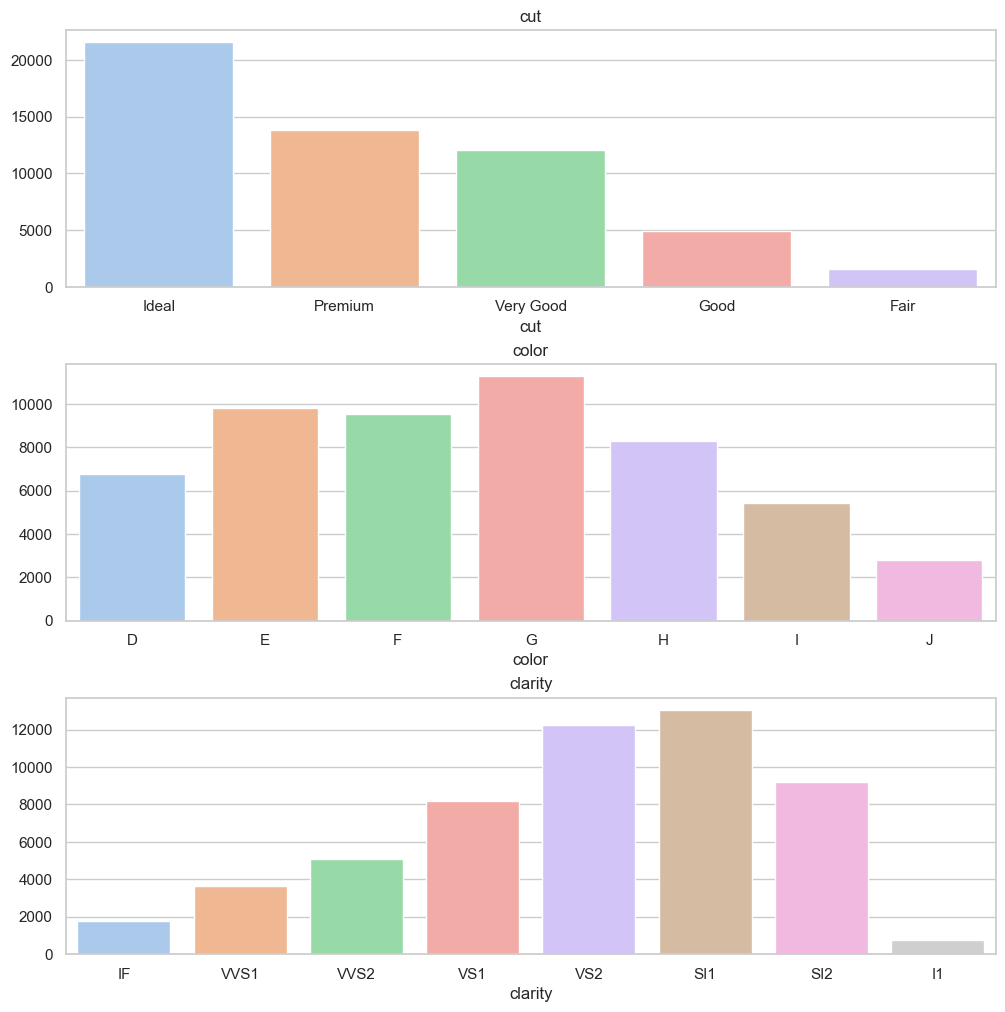

In [116]:
fig, axes = plt.subplots(3,1, figsize = (12,12))
axes = axes.flatten()

for i,col in enumerate(categoric_columns.columns):
    sns.countplot(data=df, x=col, ax=axes[i], palette="pastel")

    axes[i].set_title(col)
    axes[i].set_ylabel("")

plt.subplots_adjust(hspace=0.3);

🧠 Interpretación de la Asimetría (Skewness)

La asimetría mide qué tan equilibrada o sesgada está la distribución de una variable con respecto a su media.

| Rango de Asimetría   | Tipo de Distribución                 | Descripción Visual                          | Interpretación                                                   |
| -------------------- | ------------------------------------ | ------------------------------------------- | ---------------------------------------------------------------- |
| **≈ 0**              | Simétrica                            | 🔹 Forma equilibrada, similar a una campana | Los valores se distribuyen uniformemente alrededor de la media.  |
| **0 < Skew ≤ 0.5**   | Ligeramente sesgada a la derecha     | 🔸 Cola derecha corta                       | La mayoría de valores están por debajo de la media.              |
| **0.5 < Skew ≤ 1**   | Moderadamente sesgada a la derecha   | 🔸 Cola derecha visible                     | Hay algunos valores altos que tiran la media hacia la derecha.   |
| **Skew > 1**         | Fuertemente sesgada a la derecha     | 🔺 Cola derecha muy larga                   | Existen varios valores extremos altos (outliers positivos).      |
| **−0.5 ≤ Skew < 0**  | Ligeramente sesgada a la izquierda   | 🔸 Cola izquierda corta                     | La mayoría de valores están por encima de la media.              |
| **−1 ≤ Skew < −0.5** | Moderadamente sesgada a la izquierda | 🔸 Cola izquierda visible                   | Hay algunos valores bajos que tiran la media hacia la izquierda. |
| **Skew < −1**        | Fuertemente sesgada a la izquierda   | 🔻 Cola izquierda muy larga                 | Existen varios valores extremos bajos (outliers negativos).      |


📊 Interpretación de la Curtosis (Kurtosis)

La curtosis mide la forma del pico de la distribución y el peso de las colas, comparado con una distribución normal.

| Valor (Fisher) | Tipo de Distribución | Descripción Visual           | Interpretación                                                               |
| -------------- | -------------------- | ---------------------------- | ---------------------------------------------------------------------------- |
| **< 0**        | Platicúrtica         | 🔻 Pico plano, colas ligeras | Los valores están más dispersos, hay menos concentración y menos outliers.   |
| **= 0**        | Mesocúrtica          | 🔹 Pico normal               | La forma de la distribución es similar a la normal.                          |
| **> 0**        | Leptocúrtica         | 🔺 Pico alto, colas pesadas  | Los valores están muy concentrados cerca de la media, pero hay más outliers. |


In [117]:
for col in numeric_columns:
    print(f"{col}: skew={df[col].skew():.2f}, kurtosis={df[col].kurtosis():.2f}")

price: skew=1.62, kurtosis=2.18
carat: skew=1.12, kurtosis=1.26
depth: skew=-0.08, kurtosis=5.74
table: skew=0.80, kurtosis=2.80
x: skew=0.38, kurtosis=-0.62
y: skew=2.43, kurtosis=91.21
z: skew=1.52, kurtosis=47.09


📊 Análisis de Asimetría (Skewness) y Curtosis (Kurtosis)

| Variable  | Skewness | Interpretación (asimetría)                                                                    | Kurtosis | Interpretación (curtosis)                                                                                            |
| --------- | -------- | --------------------------------------------------------------------------------------------- | -------- | -------------------------------------------------------------------------------------------------------------------- |
| **price** | 1.62     | Fuertemente sesgada a la derecha → hay precios muy altos que estiran la cola.                 | 2.18     | Leptocúrtica → distribución con pico alto y colas pesadas (varios outliers).                                         |
| **carat** | 1.12     | Moderadamente sesgada a la derecha → la mayoría de diamantes son pequeños, pocos muy grandes. | 1.26     | Leptocúrtica → presencia de algunos valores extremos, aunque no tan marcados.                                        |
| **depth** | -0.08    | Prácticamente simétrica → distribución balanceada.                                            | 5.74     | Muy leptocúrtica → valores muy concentrados en torno a la media, con posibles outliers.                              |
| **table** | 0.80     | Moderadamente sesgada a la derecha → algunos diamantes con mesa más grande.                   | 2.80     | Leptocúrtica → pico más alto que el normal, con colas algo pesadas.                                                  |
| **x**     | 0.38     | Ligeramente sesgada a la derecha → forma casi simétrica.                                      | -0.62    | Platicúrtica → más plana y con menor concentración.                                                                  |
| **y**     | 2.43     | Fuertemente sesgada a la derecha → algunos valores extremos muy grandes.                      | 91.21    | Extremadamente leptocúrtica → muchísimos valores concentrados y unos pocos extremos muy alejados (fuertes outliers). |
| **z**     | 1.52     | Fuertemente sesgada a la derecha → colas alargadas por valores altos.                         | 47.09    | Extremadamente leptocúrtica → pico alto, concentración fuerte y presencia de outliers.                               |


# Transformaciones

In [118]:
# Seleccionamos solo las columnas numéricas
num_cols = df1.select_dtypes(include=['float64', 'int64']).columns

# Creamos una copia del dataframe para no alterar el original
df_transformed = df1.copy()

# Recorremos las columnas numéricas y aplicamos la transformación
for col in num_cols:
    skew_value = df1[col].skew()
    
    # Sesgo positivo fuerte → derecha
    if skew_value > 1:
        df_transformed[col] = np.log1p(df1[col])  # log(1 + x)
        print(f"🔹 {col}: skew={skew_value:.2f} → Transformada con LOG (sesgo derecho fuerte)")
    
    # Sesgo positivo moderado
    elif 0.5 < skew_value <= 1:
        df_transformed[col] = np.sqrt(df1[col])   # raíz cuadrada
        print(f"🔸 {col}: skew={skew_value:.2f} → Transformada con √x (sesgo derecho moderado)")
    
    # Sesgo negativo fuerte → izquierda
    elif skew_value < -1:
        df_transformed[col] = np.power(df1[col], 3)  # potencia cúbica
        print(f"🔻 {col}: skew={skew_value:.2f} → Transformada con x³ (sesgo izquierdo fuerte)")
    
    # Sesgo negativo moderado
    elif -1 < skew_value <= -0.5:
        df_transformed[col] = np.power(df1[col], 2)  # potencia cuadrada
        print(f"🔸 {col}: skew={skew_value:.2f} → Transformada con x² (sesgo izquierdo moderado)")
    
    # Si el sesgo es leve o simétrico, no se transforma
    else:
        print(f"✅ {col}: skew={skew_value:.2f} → No requiere transformación")

🔹 carat: skew=1.11 → Transformada con LOG (sesgo derecho fuerte)
✅ depth: skew=-0.11 → No requiere transformación
🔸 table: skew=0.79 → Transformada con √x (sesgo derecho moderado)
🔹 price: skew=1.62 → Transformada con LOG (sesgo derecho fuerte)
✅ x: skew=0.38 → No requiere transformación
🔹 y: skew=2.45 → Transformada con LOG (sesgo derecho fuerte)
🔹 z: skew=1.53 → Transformada con LOG (sesgo derecho fuerte)


In [119]:
for col in numeric_columns:
    print(f"{col}: skew={df_transformed[col].skew():.2f}, kurtosis={df_transformed[col].kurtosis():.2f}")

price: skew=0.11, kurtosis=-1.10
carat: skew=0.58, kurtosis=-0.45
depth: skew=-0.11, kurtosis=5.41
table: skew=0.69, kurtosis=1.95
x: skew=0.38, kurtosis=-0.63
y: skew=0.03, kurtosis=1.59
z: skew=-0.13, kurtosis=2.64


## 📊 Comparación antes y después de las transformaciones

| Variable | Skew (antes) | Skew (después) | Interpretación | Kurtosis (antes) | Kurtosis (después) | Interpretación final |
|-----------|---------------|----------------|----------------|------------------|--------------------|----------------------|
| **price** | 1.62 | **0.11** | ✅ Ahora casi simétrica. La log-transformación fue perfecta. | 2.18 | **-1.10** | Más plana (platicúrtica), sin colas pesadas. |
| **carat** | 1.12 | **0.58** | ⚙️ Mucho mejor, pasó de fuertemente a moderadamente sesgada. | 1.26 | **-0.45** | Distribución más suave, casi normal. |
| **depth** | -0.08 | **-0.11** | ✅ Ya era simétrica, se mantiene bien. | 5.74 | **5.41** | Aún muy leptocúrtica → sigue concentrada (outliers leves). |
| **table** | 0.80 | **0.69** | ✅ Asimetría reducida, distribución más equilibrada. | 2.80 | **1.95** | Curtosis disminuye → menor concentración. |
| **x** | 0.38 | **0.38** | ✅ No se transformó, sigue bien. | -0.62 | **-0.63** | Sin cambios. |
| **y** | 2.43 | **0.03** | 💯 Transformación excelente: ahora perfectamente simétrica. | 91.21 | **1.59** | Curtosis bajó drásticamente (outliers controlados). |
| **z** | 1.52 | **-0.13** | 💯 Sesgo eliminado, ligera inversión pero muy estable. | 47.09 | **2.64** | Curtosis mucho más baja; distribución razonable. |

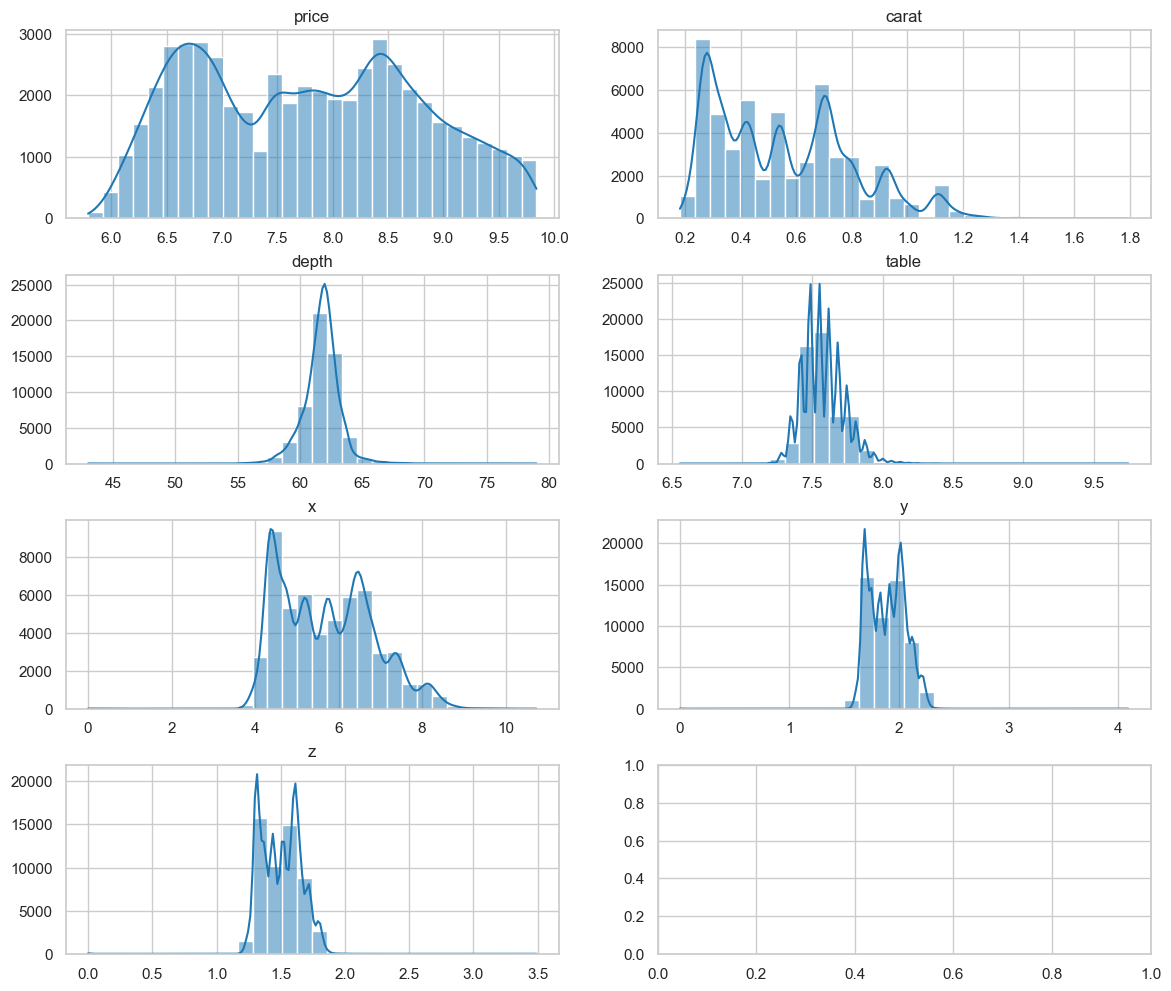

In [120]:
fig, axes = plt.subplots(4,2, figsize = (14,12))
axes = axes.flatten()

# Df con las columnas numéricas.
numeric_columns = df1[["price","carat","depth","table","x","y","z"]]

#Ciclo for para cada variable
for i,col in enumerate(numeric_columns.columns):
    sns.histplot(data=df_transformed, bins=30, x=col,kde=True, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_ylabel("")
    axes[i].set_xlabel("");


plt.subplots_adjust(hspace=0.3)

# Análisis bivariado

In [121]:
#Se elimina la variable price para poder compararla en los scatter plots
numeric_columns = numeric_columns.drop("price",axis=1)
numeric_columns

,carat,depth,table,x,y,z
0,0.23,61.5,55.0,3.95,3.98,2.43
1,0.21,59.8,61.0,3.89,3.84,2.31
2,0.23,56.9,65.0,4.05,4.07,2.31
3,0.29,62.4,58.0,4.20,4.23,2.63
4,0.31,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...
53789,0.72,60.8,57.0,5.75,5.76,3.50
53790,0.72,63.1,55.0,5.69,5.75,3.61
53791,0.70,62.8,60.0,5.66,5.68,3.56
53792,0.86,61.0,58.0,6.15,6.12,3.74


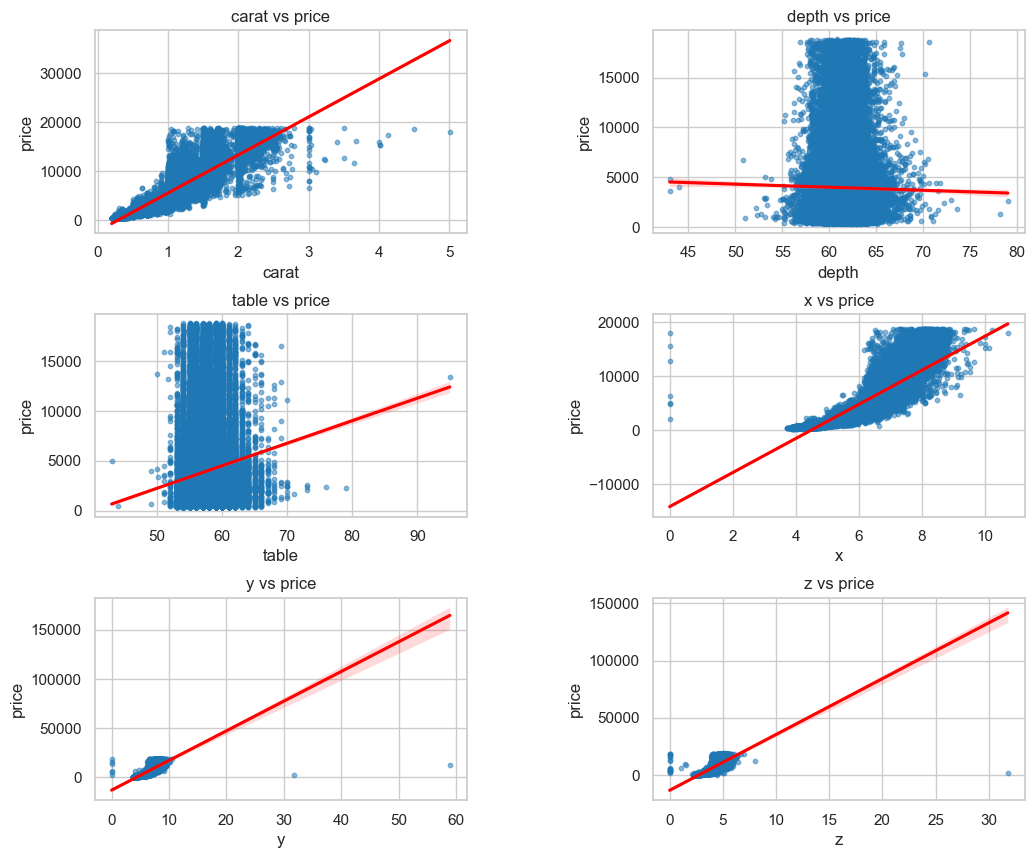

In [122]:
fig, axes = plt.subplots(3,2, figsize=(12,10));
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    sns.regplot(data=df1, x=col, y="price", scatter_kws={'alpha':0.5, 's':10}, line_kws={'color':'red'}, ax=axes[i])
    axes[i].set_title(f'{col} vs price')

plt.subplots_adjust(hspace=0.4,wspace=0.5);


### Observaciones sobre las relaciones numéricas con el precio

Al analizar los diagramas de dispersión entre las variables numéricas y el precio, se observan las siguientes tendencias:

| Variable  | Tipo de relación con el precio | Fortaleza (visual) | Observación                                                                                                    |
| --------- | ------------------------------ | ------------------ | -------------------------------------------------------------------------------------------------------------- |
| **carat** | Positiva                       | Fuerte             | A medida que aumenta el quilate, el precio se incrementa notablemente. Es la variable con mayor influencia.    |
| **depth** | Negativa                       | Débil              | Se observa una ligera tendencia descendente; no parece tener un impacto significativo en el precio.            |
| **table** | Positiva                       | Débil              | Existe una leve tendencia positiva, pero con alta dispersión. Su relación con el precio es poco clara.         |
| **x**     | Positiva                       | Fuerte             | A mayor dimensión en el eje *x*, mayor precio. Refleja una relación directa con el tamaño físico del diamante. |
| **y**     | Positiva                       | Fuerte             | Similar a *x*, presenta una relación positiva clara, aunque con presencia de algunos valores atípicos.         |
| **z**     | Positiva                       | Fuerte             | Muestra una tendencia positiva coherente con las demás dimensiones del diamante.                               |


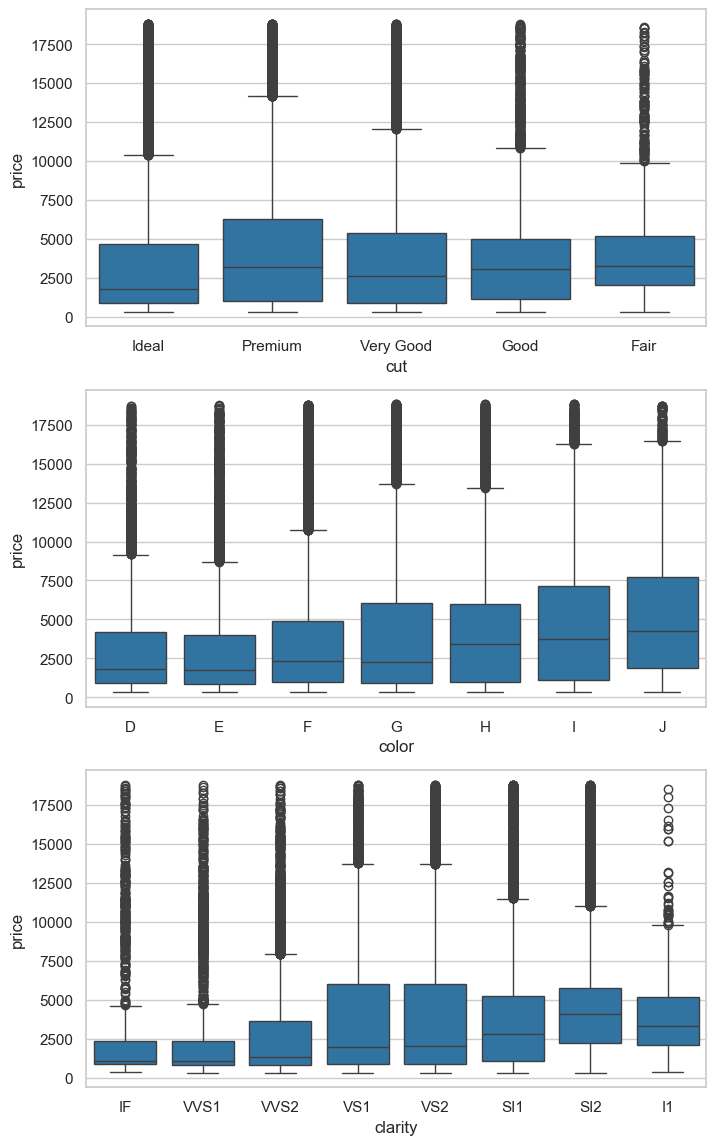

In [123]:
fig, axes = plt.subplots(3,1, figsize=(8,14))

for i,col in enumerate(categoric_columns):
    sns.boxplot(data=df1, x=col, y="price", ax=axes[i])

### Observaciones — Boxplots sin transformar (`price` original`)

En los boxplots originales (sin transformación logarítmica) se observa una alta dispersión en el precio, con numerosos valores atípicos en todas las categorías. Esto se debe a la gran variabilidad del precio de los diamantes, que puede ir desde unos pocos cientos hasta más de 18.000.

**Observaciones por variable:**
- **cut:** No se aprecia una diferencia muy marcada entre los tipos de corte. Sin embargo, los diamantes con corte *Fair* muestran una mayor dispersión en los precios, aunque no necesariamente los precios más altos.
- **color:** A medida que el color se degrada (de D a J), se observa un leve aumento del precio promedio, lo cual podría estar influenciado por el tamaño o la claridad, más que por el color en sí.
- **clarity:** Existe una tendencia más clara: los diamantes con mejor claridad (IF, VVS1, VVS2) tienden a tener precios más altos, aunque hay una gran superposición entre categorías.

**Conclusión:**
Los gráficos sin transformación muestran la distribución real del precio, pero la alta cantidad de outliers dificulta observar diferencias entre categorías. Estos valores atípicos no necesariamente son errores, sino parte natural de la variabilidad del mercado.


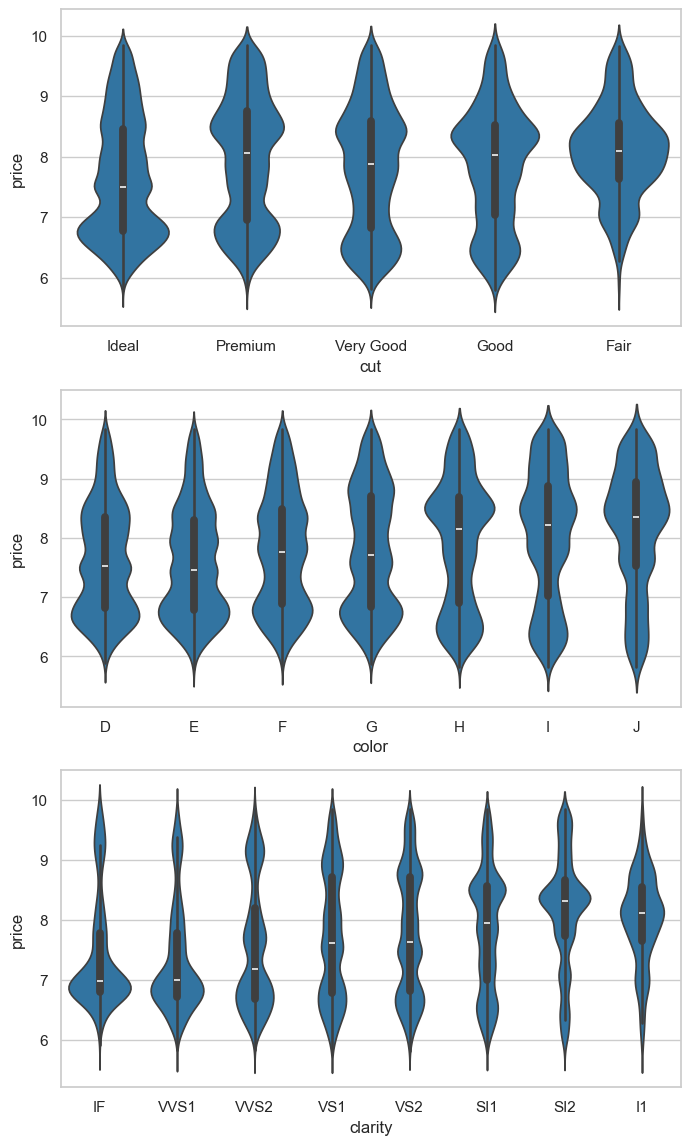

In [124]:
fig, axes = plt.subplots(3,1, figsize=(8,14))

for i,col in enumerate(categoric_columns):
    sns.violinplot(data=df_transformed, x=col, y="price", ax=axes[i])

### 💬 Observaciones — Gráficos con transformación logarítmica (`log(price)`)

| 🔹 Variable | 📊 Observación con log-transformación | 💬 Interpretación comparada con los boxplots originales |
|:------------|:--------------------------------------|:--------------------------------------------------------|
| **Cut (Corte)** | Los violines presentan una forma más compacta y simétrica entre categorías. | Al aplicar el logaritmo, la dispersión extrema disminuye y se aprecian mejor las pequeñas diferencias entre cortes. Aun así, el tipo de corte **no muestra un impacto fuerte en el precio**. |
| **Color** | Las distribuciones se vuelven más uniformes de D a J. | La transformación logarítmica reduce la influencia de los valores muy altos y permite ver que **el color apenas afecta el precio**. La leve tendencia ascendente observada sin transformar probablemente se debía al efecto del tamaño o la claridad. |
| **Clarity (Claridad)** | Las diferencias entre niveles de claridad se distinguen mejor visualmente. | El logaritmo suaviza los outliers y resalta que los diamantes con mejor claridad **tienden a tener precios más altos de forma consistente**, aunque las categorías siguen solapándose. |
| **Tendencia general** | La escala logarítmica normaliza las distribuciones y mejora la comparación entre categorías. | Los gráficos transformados muestran de forma más clara las tendencias reales, evitando que los precios extremadamente altos dominen la visualización. |

**Conclusión:**  
La transformación logarítmica de `price` permite **reducir la asimetría y los outliers**, haciendo que las distribuciones sean más comparables entre categorías.  
Mientras los boxplots originales mostraban una gran dispersión, los violinplots log-transformados **revelan patrones más interpretables**: la **claridad** tiene un efecto visible sobre el precio, mientras que **cut** y **color** mantienen una influencia limitada.


In [125]:
num_cols = df1.select_dtypes(include=['float64', 'int64'])
corr_df = num_cols.corr()
corr_df


,carat,depth,table,price,x,y,z
carat,1.000000,0.027861,0.181091,0.921548,0.975380,0.951908,0.953542
depth,0.027861,1.000000,-0.297669,-0.011048,-0.025348,-0.029389,0.094757
table,0.181091,-0.297669,1.000000,0.126566,0.194855,0.183231,0.150270
price,0.921548,-0.011048,0.126566,1.000000,0.884504,0.865395,0.861208
x,0.975380,-0.025348,0.194855,0.884504,1.000000,0.974592,0.970686
y,0.951908,-0.029389,0.183231,0.865395,0.974592,1.000000,0.951844
z,0.953542,0.094757,0.150270,0.861208,0.970686,0.951844,1.000000


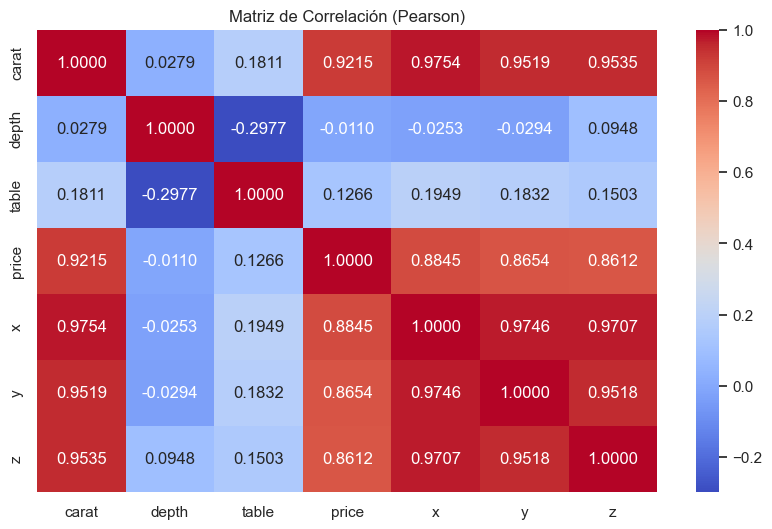

In [126]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".4f")
plt.title("Matriz de Correlación (Pearson)");

### Observaciones — Matriz de Correlación (Pearson)

La matriz de correlación evidencia relaciones fuertes entre varias variables numéricas del dataset `diamonds`, especialmente aquellas que describen el tamaño físico de los diamantes.

**1. Variables con correlaciones fuertes con el precio**
- **carat (0.92):** Es la variable más fuertemente correlacionada con el precio. Esto confirma que el peso del diamante es el principal determinante del valor.
- **x (0.88), y (0.86), z (0.86):** Estas tres dimensiones físicas también muestran correlaciones muy altas con el precio. Esto tiene sentido porque están directamente relacionadas con el tamaño del diamante, y por tanto con su peso (carat).

**2. Variables con correlaciones débiles con el precio**
- **table (0.12):** Presenta una correlación positiva muy baja; su influencia sobre el precio es mínima.
- **depth (-0.01):** Su correlación es prácticamente nula, indicando que esta medida no tiene relación lineal con el precio.

**3. Relaciones entre variables predictoras**
- **carat** correlaciona de forma extremadamente alta con **x**, **y** y **z** (entre 0.95 y 0.97). Esto sugiere una fuerte multicolinealidad entre estas variables, ya que todas representan dimensiones del tamaño del diamante.
- **table** y **depth** muestran correlaciones bajas o negativas con el resto de las variables, lo que indica que no siguen la misma estructura de relación que las variables de tamaño.

**Conclusión general:**
El precio está explicado principalmente por el tamaño/peso del diamante (carat y dimensiones x, y, z). Las variables depth y table aportan muy poca información lineal, mientras que las variables de tamaño presentan multicolinealidad entre sí, lo que debe considerarse al construir modelos predictivos.


# Análisis de Multicolinealidad

In [127]:
#Se crea df vacio para guardar los resultados del VIF (variance_inflation_factor)
vif_data = pd.DataFrame()

vif_data["variable"] = numeric_columns.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_columns.values, i) for i in range(numeric_columns.shape[1])]

vif_data

,variable,VIF
0,carat,71.000587
1,depth,516.091282
2,table,500.881069
3,x,1288.173246
4,y,529.603256
5,z,539.793261


### ¿Qué es el VIF (Variance Inflation Factor)?

El Variance Inflation Factor (VIF) es una métrica utilizada para detectar la multicolinealidad entre variables predictoras en un modelo estadístico.  
La multicolinealidad ocurre cuando dos o más variables están altamente correlacionadas entre sí, lo que genera redundancia e inestabilidad en los modelos de regresión.

#### ¿Cómo se interpreta el VIF?

Los valores típicos se interpretan así:

- **VIF = 1:** No hay multicolinealidad.
- **VIF entre 1 y 5:** Multicolinealidad moderada, no suele ser un problema.
- **VIF entre 5 y 10:** Multicolinealidad alta, se debe vigilarlas.
- **VIF > 10:** Multicolinealidad severa. La variable aporta información redundante y puede afectar negativamente los modelos.

Un VIF elevado indica que la varianza del coeficiente de esa variable está inflada debido a su relación con otras variables del modelo.


### 📝 Observación sobre los valores de VIF

Los valores obtenidos para el **Factor de Inflación de la Varianza (VIF)** muestran una **multicolinealidad extremadamente alta** entre las variables numéricas del dataset de diamantes:

| Variable | VIF |
|---------|----------------|
| carat   | 71.00          |
| depth   | 516.09         |
| table   | 500.88         |
| x       | 1288.17        |
| y       | 529.60         |
| z       | 539.79         |

Estos resultados indican que **todas las variables están fuertemente relacionadas entre sí**, especialmente **x, y, z**, ya que representan dimensiones físicas del diamante. También **carat, depth y table** muestran relaciones internas fuertes con las demás medidas.

Un VIF tan elevado implica que:

- La **información que aportan estas variables se solapa** (aportan datos muy parecidos).
- El modelo podría volverse **inestable o difícil de interpretar**, ya que los coeficientes dependen demasiado unos de otros.
- Es recomendable **revisar las variables**, eliminar algunas o aplicar técnicas como **PCA**, **regularización** (Ridge/Lasso) o crear nuevas variables agregadas para reducir la multicolinealidad.

En resumen, los valores confirman que el conjunto de variables numéricas del dataset presenta **multicolinealidad severa** y requiere ajustes antes de construir un modelo de regresión fiable.



In [128]:
df1["volume"] = df1["x"] * df1["y"] * df1["z"]
df1["volume_log"] = np.log(df1["volume"] + 1)
df1

,carat,cut,color,clarity,depth,table,price,x,y,z,volume,volume_log
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030,3.668729
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856,3.569698
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885,3.665531
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580,3.865447
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250,3.968729
...,...,...,...,...,...,...,...,...,...,...,...,...
53789,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,115.920000,4.761490
53790,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,118.110175,4.780049
53791,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,114.449728,4.748835
53792,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,140.766120,4.954179


En esta etapa se creó la variable `volume` como producto de las dimensiones `x`, `y` y `z`, con el objetivo de representar el tamaño físico del diamante. Esta variable resume información redundante y mejora la correlación con el precio.

Aunque se observó multicolinealidad severa entre las dimensiones originales, no se eliminó ninguna variable ni se aplicaron técnicas de reducción (como PCA), ya que el propósito actual es únicamente exploratorio.

Las decisiones para reducir multicolinealidad (como eliminar variables, usar `volume` en lugar de `x`, `y`, `z`, o aplicar PCA) se dejarán para la fase de modelado, donde depende del tipo de algoritmo a utilizar.



In [144]:
vif_dataVolume = pd.DataFrame()

#Eliminar variable dependiente, y las que conforman el volume
col_limpias = df1.drop(["price","x","y","z","volume_log","clarity","cut","color"],axis=1)
vif_dataVolume["variable"] = col_limpias.columns

vif_dataVolume["VIF"] = [variance_inflation_factor(col_limpias.values, i) 
              for i in range(col_limpias.shape[1])]
vif_dataVolume

,variable,VIF
0,carat,81.905045
1,depth,389.535725
2,table,397.013149
3,volume,79.992305


En esta etapa se calculó el VIF para las variables numéricas relevantes, incluyendo `volume`:

| Variable | VIF       |
|----------|-----------|
| carat    | 81.91     |
| depth    | 389.54    |
| table    | 397.01    |
| volume   | 79.99     |

Se observa colinealidad severa entre las dimensiones originales y con `volume`, lo cual es esperado. No se eliminó ninguna variable, ya que el objetivo actual es exploratorio. Las decisiones de reducción de colinealidad se tomarán en la fase de modelado.


In [147]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53794 entries, 0 to 53793
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   carat       53794 non-null  float64 
 1   cut         53794 non-null  category
 2   color       53794 non-null  category
 3   clarity     53794 non-null  category
 4   depth       53794 non-null  float64 
 5   table       53794 non-null  float64 
 6   price       53794 non-null  int64   
 7   x           53794 non-null  float64 
 8   y           53794 non-null  float64 
 9   z           53794 non-null  float64 
 10  volume      53794 non-null  float64 
 11  volume_log  53794 non-null  float64 
dtypes: category(3), float64(8), int64(1)
memory usage: 3.8 MB


### Insights y Conclusiones del EDA

1. **Colinealidad entre variables numéricas**  
   - Las dimensiones `x`, `y`, `z`, `depth` y `table` presentan colinealidad severa entre sí y con `volume` (VIF muy alto).  
   - `carat` resume la información de tamaño del diamante y presenta la mayor correlación con `price`.  
   - **Decisión:** Para futuros modelos se recomienda mantener solo `carat` como variable numérica principal, evitando colinealidad.

2. **Variables categóricas relevantes**  
   - `cut`, `color` y `clarity` aportan información adicional sobre el diamante.  
   - Se observan patrones claros: diamantes con corte y claridad superior tienden a tener precios más altos.

3. **Distribución de la variable objetivo (`price`)**  
   - `price` está sesgada a la derecha (skew positivo).  
   - Esto sugiere que, en modelos lineales futuros, se podría aplicar una transformación logarítmica para estabilizar la varianza.

4. **Outliers y valores extremos**  
   - Existen diamantes con `carat` y `price` significativamente altos, que podrían considerarse outliers.  
   - Este comportamiento es esperado en el dataset y debe documentarse, pero no se eliminaron en EDA.

5. **Relaciones adicionales**  
   - `volume` está altamente correlacionado con `carat`, confirmando que es una derivada de las dimensiones físicas (`x`, `y`, `z`).  
   - `depth` y `table` tienen baja correlación con `price`, reforzando la decisión de no incluirlas en futuros modelos.

6. **Decisiones y recomendaciones para modelado**  
   - Mantener `carat` y las variables categóricas (`cut`, `color`, `clarity`).  
   - Excluir `x`, `y`, `z`, `depth`, `table` y `volume` para evitar problemas de colinealidad.  
   - Considerar transformaciones de `price` o `carat` si se usan modelos lineales.  
   - Documentar los outliers y posibles valores extremos.

